In [27]:
import numpy as np
import pandas as pd

In [59]:
filename = "data"
with open(filename, 'r', encoding="utf-8") as f:
    w = f.readlines()


In [60]:
head = ['CPU_ri',
        'CPU_rank',
        'CPU_gen',
        'Cinebench R15 マルチ',
        'core',
        'thread',
        'TDP',
        'clock',
        'max_clock',
        'price']
head

['CPU_ri',
 'CPU_rank',
 'CPU_gen',
 'Cinebench R15 マルチ',
 'core',
 'thread',
 'TDP',
 'clock',
 'max_clock',
 'price']

In [75]:
data = []
for i in range(0, len(w)):
    if "Ryzen" in w[i] or "Core" in w[i]:
        cpu = w[i].split()
        f = w[i+2].split()
        f[5] = int(f[5].replace('円', ''))
        
        data.append({
            'CPU_ri': cpu[0],
            'CPU_rank': cpu[1],
            'CPU_gen': cpu[2],
            'cinebench': int(w[i+1]),
            'core': int(f[0]),
            'thread': int(f[1]),
            'TDP': f[2],
            'clock': f[3],
            'max_clock': f[4],
            'price': f[5],
            'performance': float(f[6])
        })
df = pd.DataFrame(data)

In [77]:
df.head()

,CPU_ri,CPU_rank,CPU_gen,cinebench,core,thread,TDP,clock,max_clock,price,performance
0,Ryzen,9,5950X,4569,16,32,105W,3.4GHz,4.9GHz,106500,0.44
1,Ryzen,9,5900X,3568,12,24,105W,3.7GHz,4.8GHz,71500,0.56
2,Ryzen,9,3950X,3897,16,32,105W,3.5GHz,4.7GHz,79000,0.50
3,Ryzen,9,3900XT,3192,12,24,105W,3.8GHz,4.7GHz,60000,0.56
4,Ryzen,9,3900X,3168,12,24,105W,3.8GHz,4.6GHz,58000,0.57


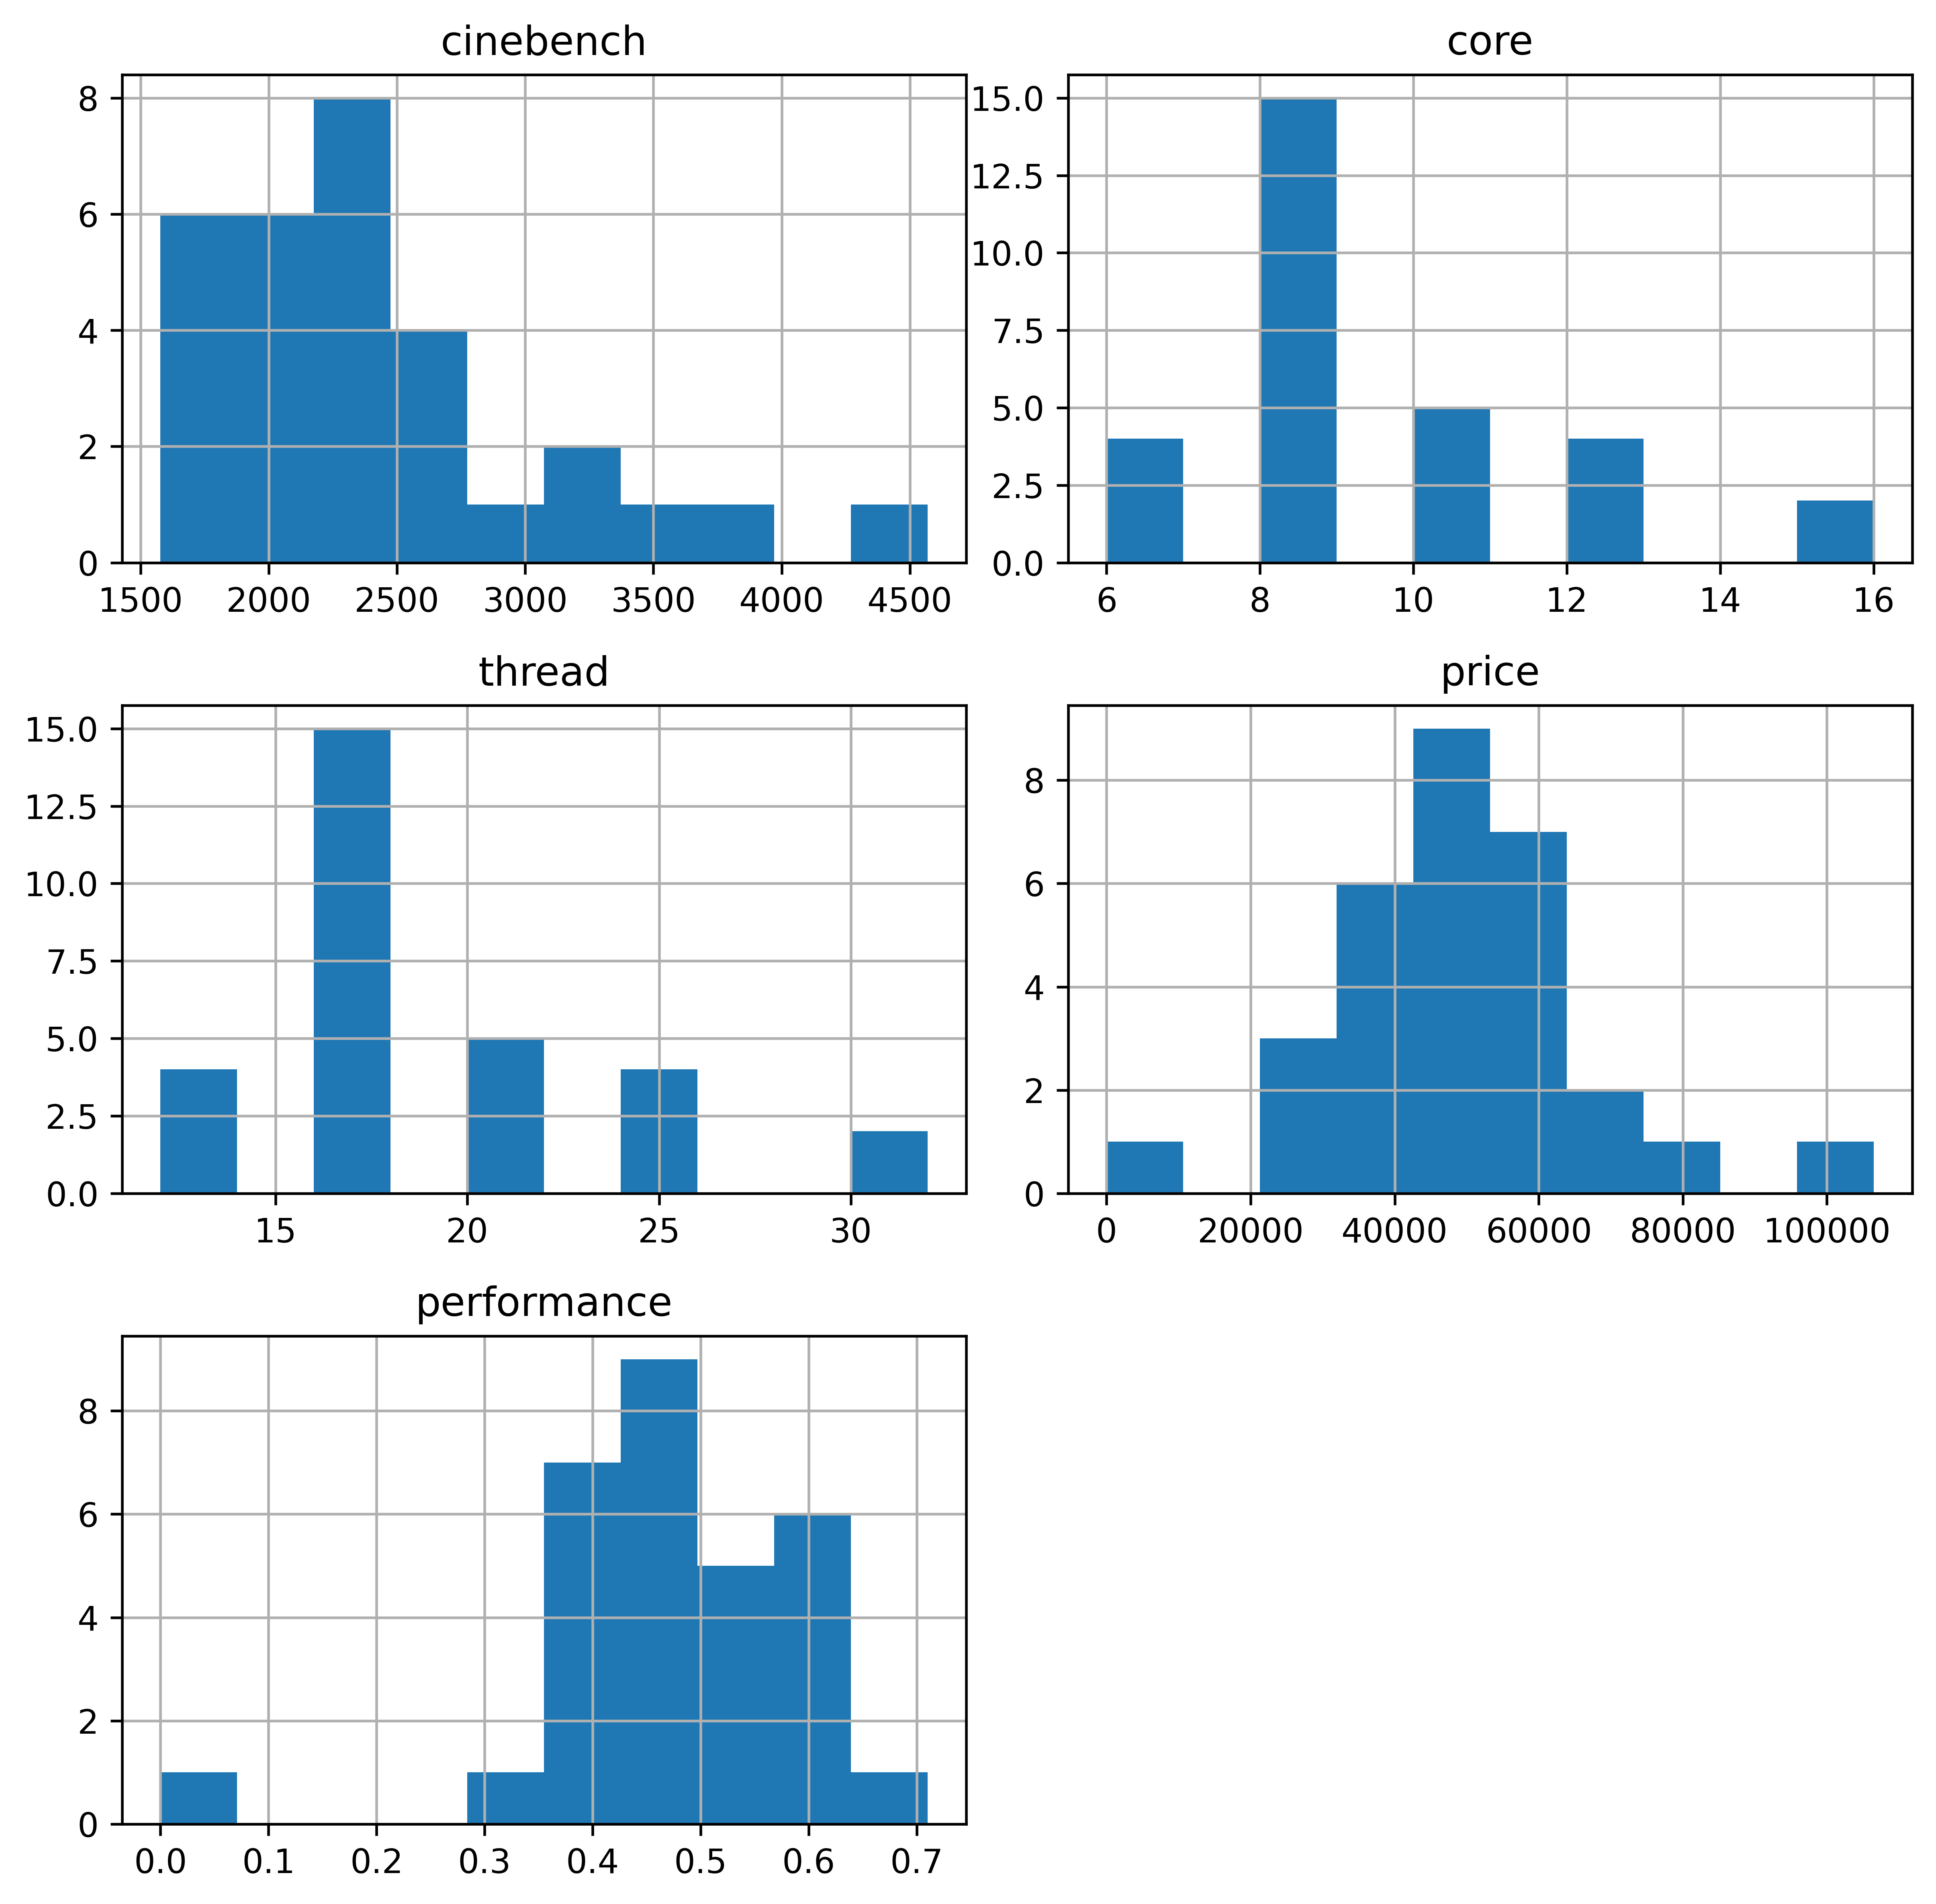

In [148]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 8, 8
rcParams['figure.dpi'] = 600

df.hist()
plt.tight_layout()
plt.show()

In [181]:
print("cinebench")
print("mean: {:.2f}".format(df['cinebench'].mean()))
print("mode: %s" % (df['cinebench'].mode()))
print("median: {:.2f}".format(df['cinebench'].median()))

cinebench
mean: 2422.80
mode: 0    2114
dtype: int64
median: 2245.00


In [172]:
df['performance'].mode()

0    0.48
1    0.57
dtype: float64

In [173]:
df['performance'].median()

0.475

In [167]:
df.describe()

,cinebench,core,thread,price,performance
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2422.800000,9.133333,18.266667,49416.666667,0.470000
std,683.436973,2.556039,5.112077,18797.965468,0.125286
min,1578.000000,6.000000,12.000000,0.000000,0.000000
25%,2006.000000,8.000000,16.000000,39625.000000,0.410000
50%,2245.000000,8.000000,16.000000,49000.000000,0.475000
75%,2661.750000,10.000000,20.000000,59000.000000,0.560000
max,4569.000000,16.000000,32.000000,106500.000000,0.710000


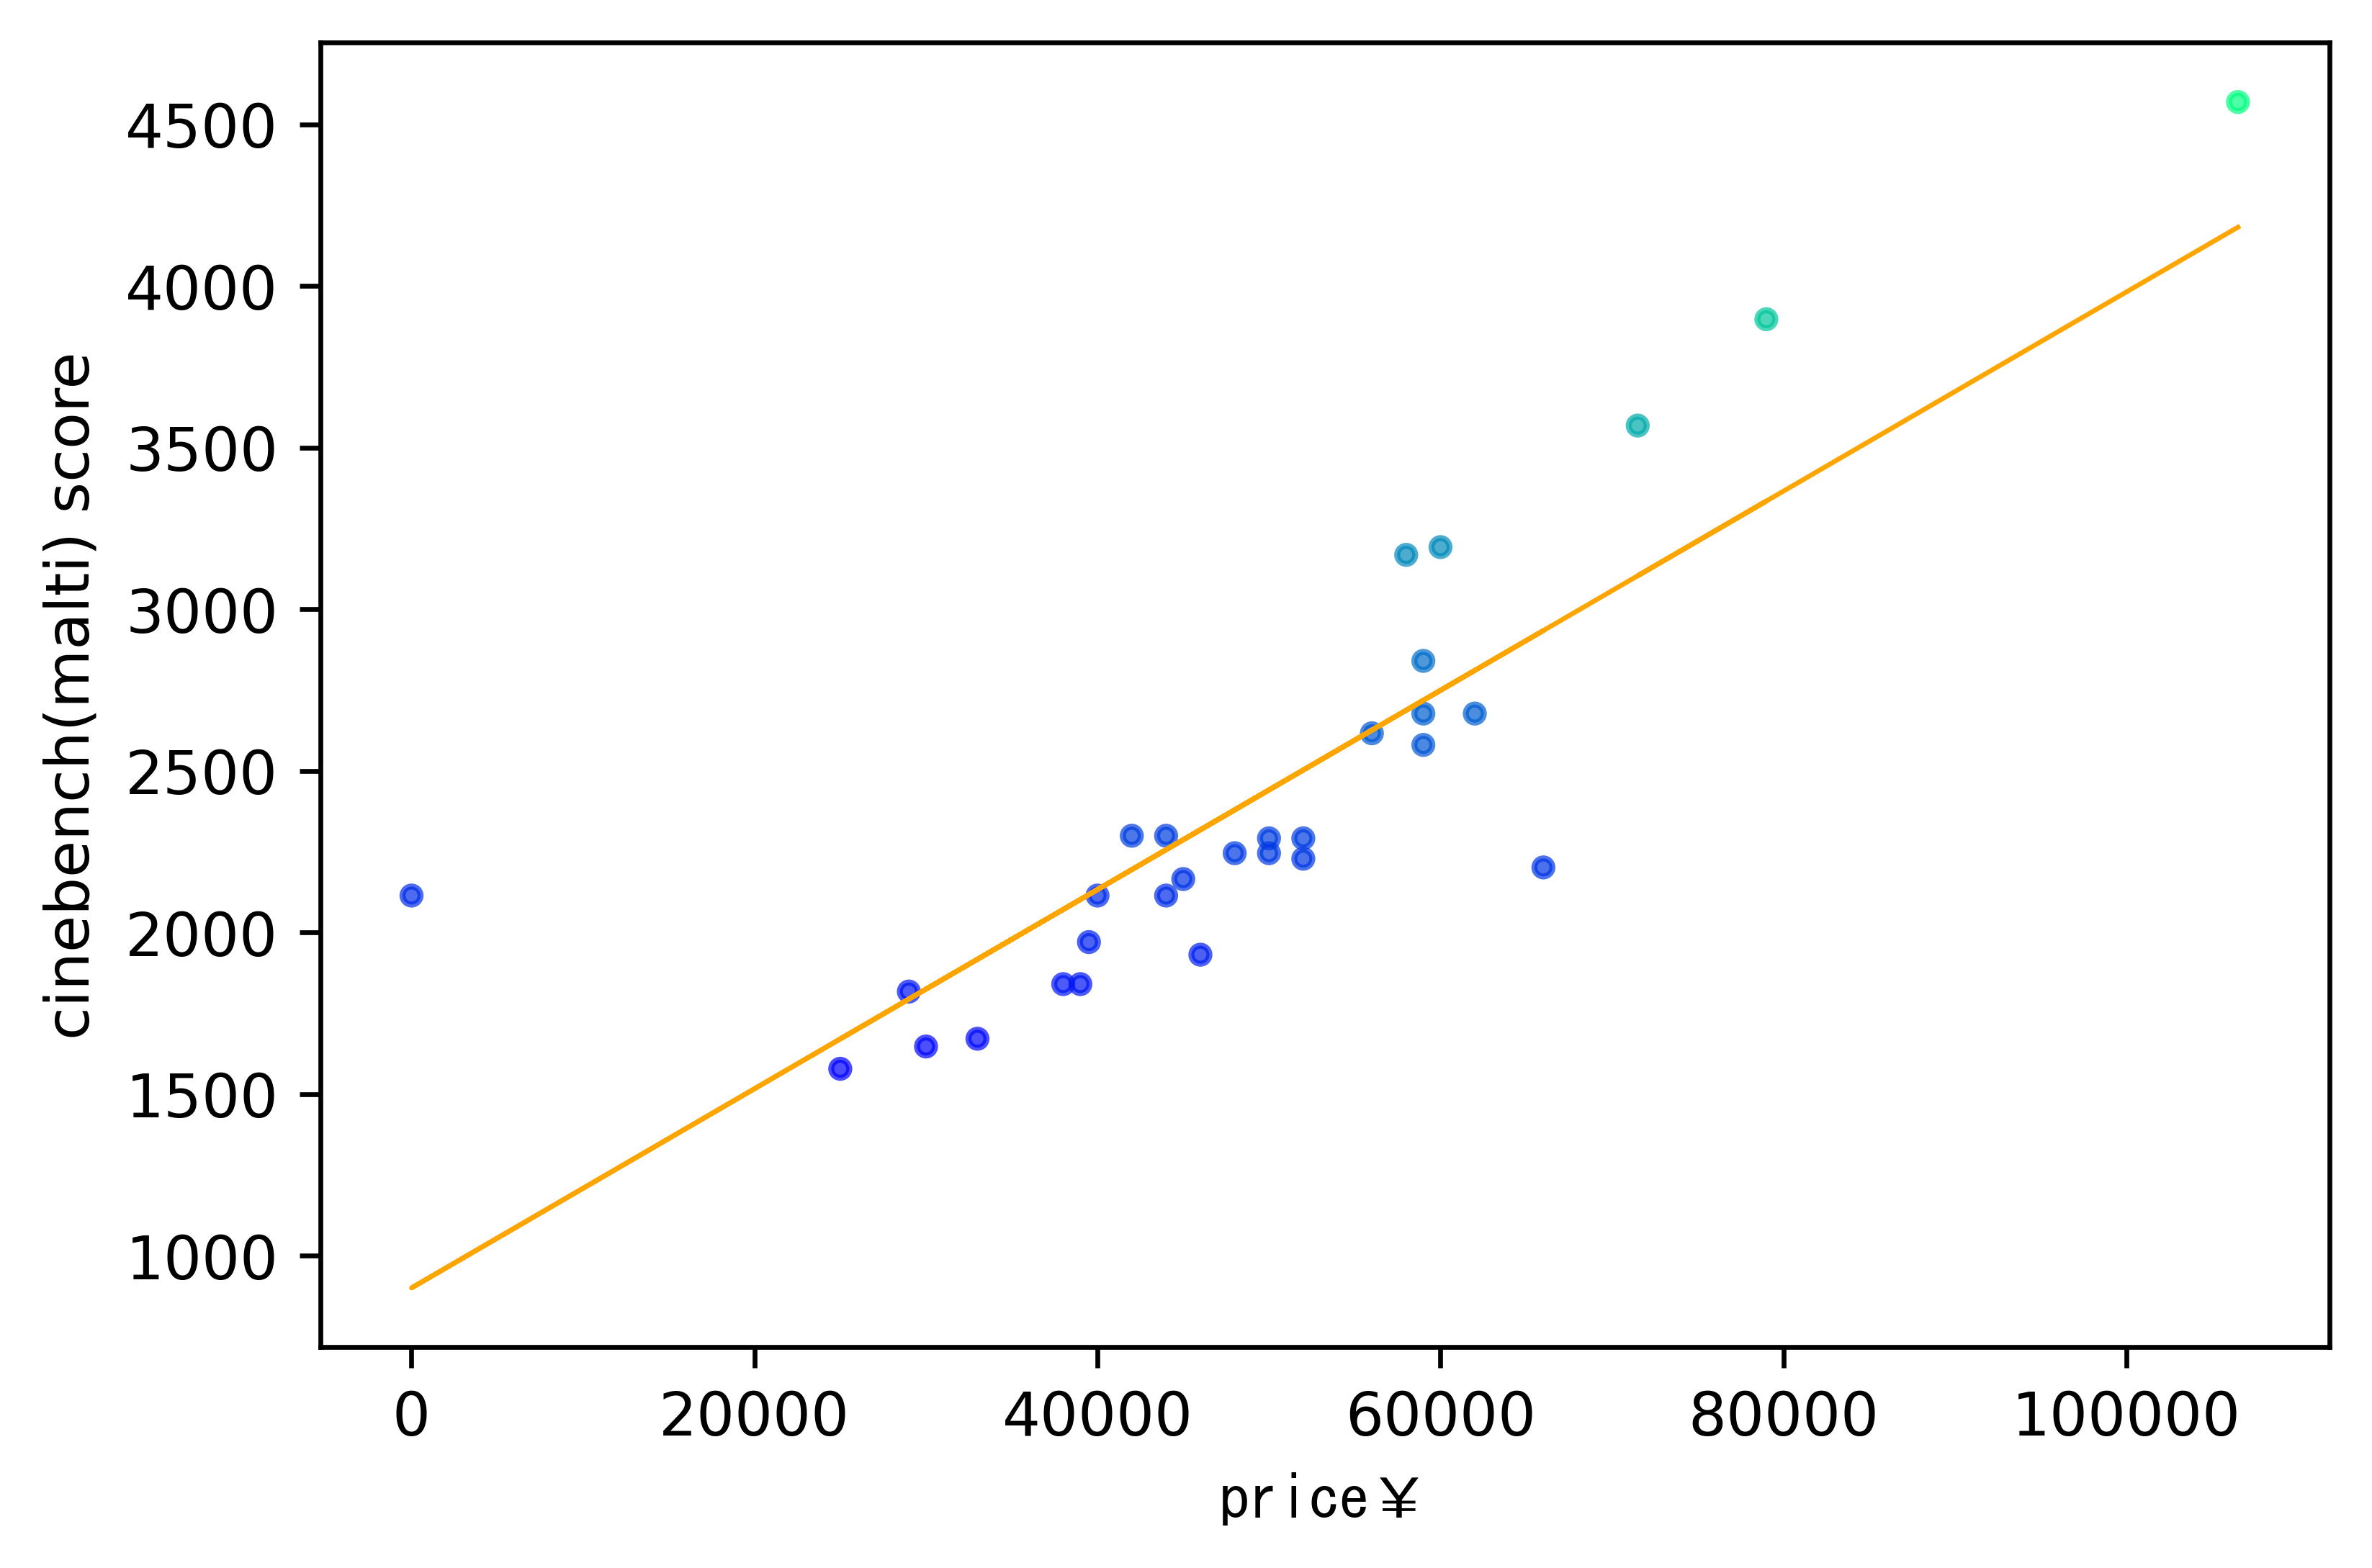

y = 0.03x + 900.04


In [163]:
from sklearn.linear_model import LogisticRegression
import matplotlib
%matplotlib inline
model = LogisticRegression(random_state=42)


X = df['price'].values

Y = df['cinebench'].values

plt.figure(figsize=(6, 4), dpi=600)
plt.scatter(X2, Y, c=Y, marker='.',
            cmap=matplotlib.cm.get_cmap(name='winter'), alpha=0.7)
plt.xlabel('price￥', fontname="MS Gothic")
plt.ylabel('cinebench(malti) score')

plt.plot(X2, clf.predict(X2), c='orange', linewidth=0.8)
plt.savefig('sample.png', format='png')
plt.show()
print("y = {:.2f}x + {:.2f}".format(clf.coef_[0], clf.intercept_))